In [1]:
import numpy as np

from matplotlib import pyplot as plt
from asteroloc8.prior import NuPrior

In [2]:
tic261154649 = NuPrior(
    teff_spec=4947., teff_spec_err=92.,
    logg_spec=2.4565, logg_spec_err=0.05, 
    plx=1.44, plx_err=0.01, 
    jmag=8.293, jmag_err=0.03, 
    hmag=7.694, hmag_err=0.023, 
    kmag=7.559, kmag_err=0.027,
)

In [3]:
a = tic261154649.gaiascalnmx(mass='giants', N_samples=10000)
print('numax_50th = ', a[0][0])
print('numax_std = ', a[0][1])

numax_50th =  30.28591078595059
numax_std =  2.1089309617327188


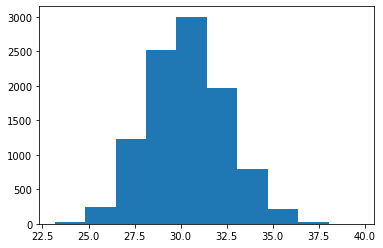

In [4]:
plt.hist(a[1]);

In [5]:
b = tic261154649.specnmx()
print('numax_50th = ', b[0][0])
print('numax_std = ', b[0][1])

numax_50th =  34.50953960565552
numax_std =  4.1676418452268145


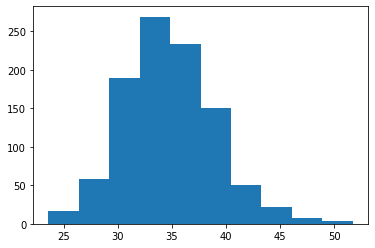

In [6]:
plt.hist(b[1]);

In [7]:
infile='DR16_APOTIC_NS_TMshort2.txt'

In [8]:
outfile = infile.replace('.txt','_out.txt')

In [9]:
stars=np.loadtxt(infile, usecols=(0,3,4,5,6,7,8,9,10,11,12,13,14), skiprows=1)

In [10]:
ids,ateff,atefferr,alogg,aloggerr, gparallax, gparallaxerr, tj, tjerr,th, therr,tk, tkerr=zip(*stars) 

In [11]:
open(outfile,'w').write('## TICID  specnumax  specnumaxerr gaianumax  gaianumaxerr \n')

59

In [ ]:
for i in range(len(ids)):
    star=NuPrior(teff_spec=ateff[i], teff_spec_err=atefferr[i], logg_spec=alogg[i], logg_spec_err=aloggerr[i], plx=gparallax[i], plx_err=gparallaxerr[i], 
        jmag=tj[i], jmag_err=tjerr[i], hmag=th[i], hmag_err=therr[i], kmag=tk[i], kmag_err=tkerr[i])
 
    if gparallax[i] > 0:
        gaiastar=star.gaiascalnmx(mass='giants')
        gaianumaxstar=gaiastar[0][0]
        gaianumaxrangestar=gaiastar[0][1]
    else:
        gaianumaxstar=-9999
        gaianumaxrangestar=-9999

    if (ateff[i] > 0 and alogg[i] > -10):
        specstar=star.specnmx()
        specnumaxstar=specstar[0][0]
        specnumaxrangestar=specstar[0][1]
    else:
        specnumaxstar=-9999
        specnumaxrangestar=-9999   
        
    lin='   %.0f'%ids[i]+'\t'+'   %.6f'%specnumaxstar+'\t'+'   %.6f'%specnumaxrangestar+'\t'+'   %.6f'%gaianumaxstar+'\t'+'   %.6f'%gaianumaxrangestar+'\n'
    open(outfile,'a').write(lin)     

/Users/ajl573/Repos/alexlyttle/asteroloc8/asteroloc8/prior.py:217: RuntimeWarning: invalid value encountered in log10
  MK = Kmag-(5*np.log10(1000/parallax)-5)
